In [33]:
# Run 1B.1 9.12.23-9.23.23
- 9 days (142 x 9 x 81000= 103M total FFTs, 2^24, 2.4GHz clock) 
- switch antenna and term (switch=1 is terminator. 1/15 duty cycle) 
- 5dB (3+1+1) fixed attenuation, pasternack 1012E to mini circuits zkl1r5+A (9V regulated from battery). 
- Run started 2023-09-13 16:32:41.33
- Right at clipping

SyntaxError: invalid syntax (2976814587.py, line 2)

In [21]:
import sys 
import numpy as np
import settings as s
import matplotlib.pyplot as plt 
import importlib
importlib.reload(s)
from cupyx.profiler import benchmark
import h5py
import os
import re
import time
import datetime
from datetime import datetime
import pandas as pd
import math
from scipy.optimize import curve_fit

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

sys.path.insert(0, '../../../drlib')
import drlib as dr
%matplotlib widget

def mad_np(arr):
    median = np.median(arr)
    return np.median(np.abs(arr-median))

def freq2Idx(freq, freqsAll):
    return int(freq/freqsAll[-1] * len(freqsAll))

def idx2freq(idx, freqs):
    return  ((freqs[-1] - freqs[0])/len(freqs) * idx) + freqs[0]

dataDir         = '/drBiggerBoy/run1Bp1/'
filename        = 'packedh5.hdf5'
databaseFile    = 'database.txt'

antSpecSufix    = 'ALL_103M_FFTs_11_5_24'
termSpecSufix   = 'ALL_103M_FFTs_11_5_24'
vetoSpecSufix   = 'ALL_103M_FFTs_11_5_24'

databaseDf      = pd.read_csv(dataDir + databaseFile)

totalAcqs       = int(open(dataDir + databaseFile, 'r'
                    ).readlines()[-1].split(',')[0].strip()) + 1 

print(totalAcqs)
    
# Generate antIdx and termIdx from database file
# Open the data file and read the lines
# should rewrite this to use DF
with open(dataDir + databaseFile, 'r') as f:
    # Skip the header line
    next(f)
    # Initialize the two arrays
    antIdx = []
    termIdx = []
    # Loop through the remaining lines and extract the acqNum values
    for line in f:
        # Split the line into fields
        fields = line.strip().split(',')
        # Extract the SWITCH_POS and ACQ NUM values
        switch_pos = int(fields[2])
        acq_num = int(fields[0])
        # Append the acqNum value to the appropriate array
        if switch_pos == 0:
            antIdx.append(acq_num)
        elif switch_pos == 1:
            termIdx.append(acq_num)
    
    #find acqNums that are within first three after antenna move
    badAcqs = [0]
    for i in range(1, totalAcqs):
        if i % 144 == 0:
            badAcqs.append(i-1)
            #badAcqs.append(i+1) # this is "bad" terminator, no need to throw it out
            #badAcqs.append(i+2)
    print(f'Bad acq nums = {badAcqs}')

#Throw out three after antenna move and everything after 1855 (last in run 3)
antIdx  = [i for i in antIdx if i not in(badAcqs)]
termIdx = [i for i in termIdx if i not in(badAcqs)]

# Print the results
print("antIdx =", antIdx)
print("termIdx =", termIdx)

for i in antIdx:
    #print(i)
    pass



1295
Bad acq nums = [0, 143, 287, 431, 575, 719, 863, 1007, 1151]
antIdx = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

diff mean:              591.2258656174653
diff median:            566.2658355000001
diff STD:               320.59432053217125
diff percent error:     54.225354331774454
expected single time:   1.7476266666666667
total time:             765046.270109
expected total time:    80971.03872


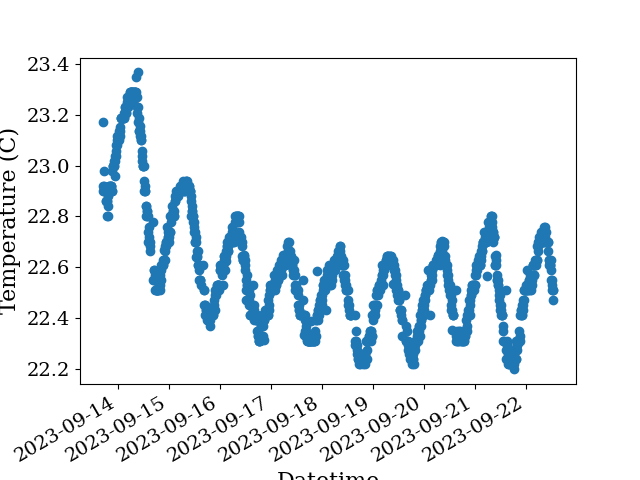

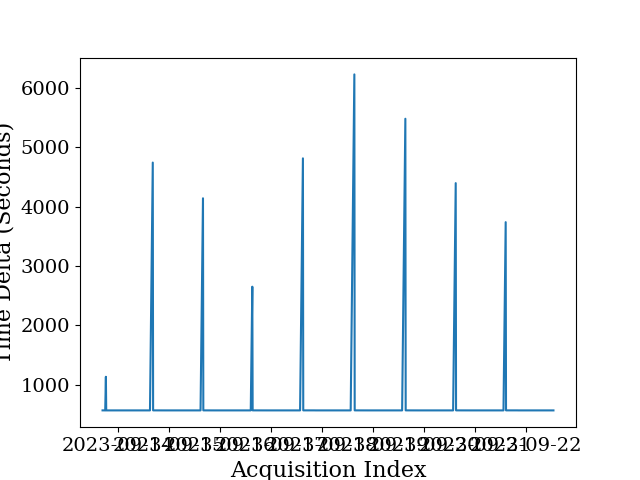

In [19]:
#time delta analysis
datetimes_str = np.loadtxt(f'{dataDir}database.txt',
                        skiprows=1,
                        usecols=1,
                        delimiter=',',
                        dtype=str)
datetimes =[]
for date in datetimes_str:
    data = date[10]
    datetimes.append(datetime.strptime(date, ' %Y-%m-%d %H:%M:%S.%f'))


diff = []
for i in range(len(datetimes)-1):
    diff.append((datetimes[i+1] - datetimes[i]).total_seconds())

print(f"diff mean:              {np.mean(diff)}")
print(f"diff median:            {np.median(diff)}")
print(f"diff STD:               {np.std(diff)}")
print(f"diff percent error:     {np.std(diff)/np.mean(diff) * 100}")
print(f"expected single time:   {2**24/s.SAMPLE_RATE * 250}")
print(f"total time:             {(datetimes[-1] - datetimes[0]).total_seconds()}")
print(f"expected total time:    {2**24/s.SAMPLE_RATE * s.NOF_BUFFERS_TO_RECEIVE * s.NOF_ACQUISITIONS_TO_TAKE}")

plt.close('all')
#TEMPERATURE
plt.figure()
plt.scatter(datetimes, databaseDf['TEMP'] -273.15)
#databaseDf.plot(x='DATETIME', y='TEMP')
plt.gcf().autofmt_xdate()
plt.xlabel('Datetime')
plt.ylabel('Temperature (C)')
plt.show()


plt.figure()
plt.plot(datetimes[1:], diff)
plt.xlabel('Acquisition Index')
plt.ylabel('Time Delta (Seconds)')
plt.show()

In [20]:
#pack pre proc dataset

try:
    f.close()
    print("closed")
except:
    print("didn't close")
    pass

rawDataDir      = dataDir + 'data/'
fileList        = os.listdir(rawDataDir)
fileList.sort(key=lambda f: int(re.sub('\D', '', f)))
newDataDir      = dataDir
fileName        = 'packedh5.hdf5'
if 0: #will overwrite!!!

    f               = h5py.File(newDataDir + fileName, 'w')

    #init empty dataset
    # 4194305 = 2^(23-1) + 1
    print(f'initilizing dataset 4194305x{totalAcqs}')
    specA_W    = f.create_dataset('spec_W_chA', (4194305, totalAcqs), chunks = (2**16,2**0), dtype = 'f')
    specB_W    = f.create_dataset('spec_W_chB', (4194305, totalAcqs), chunks = (2**16,2**0), dtype = 'f')
    print(specA_W)
    print(specB_W)

    ##############################################################
    #Main loop
    ##############################################################
    numFiles        = 0
    numMeasData     = 0
    numRigolSpec    = 0

    compType = False
    chunks = None #must add chunks arg to create dataset calls

    for fileidx, file in enumerate(fileList):
        if fileidx % 1 == 0:
            print(file)
        dataset         = h5py.File(rawDataDir +  file, 'r')
        numFiles        += 1
        measDataKeys    = list(dataset.keys())
        measDataKeys.sort(key=lambda f: int(re.sub('\D', '', f)))
        #measDataKeys = [int(key) for key in measDataKeys]

        for measData in measDataKeys:
            print(measData)
            measDataInt = int(measData)
            '''Dumb check. Is the date in raw h5 measData the same as what
            the database thinks it is? Since we previously check that dates
            are consectutive this also checks that dates 
            in raw h5 are consecutive'''
            '''datasetDf   = pd.read_hdf(rawDataDir + file, key = measData)#raw H5 
            dateTimeStr = datasetDf.columns[0][0]#datetime extracted from raw H5
            dateTime    = datetime.strptime(dateTimeStr, '%Y-%m-%d %H:%M:%S.%f')'''

            '''Check database at a measData has the same datetime as we are about
            to load into new h5'''
            '''if not (dateTime==database[database['measData'] == measDataInt].index):
                print('Dates got jumbled at measData', measDataInt)'''
            specA_W_np        = np.float32(dataset[measData]['chASpec_W'])
            specB_W_np        = np.float32(dataset[measData]['chBSpec_W'])


            specA_W[:, measDataInt]    = specA_W_np
            specB_W[:, measDataInt]    = specB_W_np

f.close()

closed
initilizing dataset 4194305x1295
<HDF5 dataset "spec_W_chA": shape (4194305, 1295), type "<f4">
<HDF5 dataset "spec_W_chB": shape (4194305, 1295), type "<f4">
0.hdf5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
1.hdf5
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
2.hdf5
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
3.hdf5
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
4.hdf5
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
5.hdf5
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
6.hdf5
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223

In [26]:
#Average and save spectra

#location of packed h5
fileName        = 'packedh5.hdf5'


def avgSpecFromPacked(avgIdxs, specStr):
    sum = np.zeros(2**22+1)
    for i in avgIdxs:
        sum += f[specStr][:,i]
    avgSpec = sum/(len(avgIdxs))
    return avgSpec


#Average, filter and save
if 0:
    f               = h5py.File(dataDir + fileName, 'r')
    
    #antIdxs     = range(0, totalAcqs-1, 2)[0:-1]
    #termIdxs    = range(1, totalAcqs-1, 2)
    avgAntSpec  = avgSpecFromPacked(antIdx, 'spec_W_chB')
    print('Done with ant avg')
    avgVetoSpec  = avgSpecFromPacked(antIdx, 'spec_W_chA')
    print('Done with veto avg')
    avgTermSpec = avgSpecFromPacked(termIdx, 'spec_W_chB')
    print('Done with term avg')

    np.save('./avgSpecs_gitignore/avgAntSpec_W_' + antSpecSufix, avgAntSpec)
    np.save('./avgSpecs_gitignore/avgVetoSpec_W_' + vetoSpecSufix, avgVetoSpec)
    np.save('./avgSpecs_gitignore/avgTermSpec_W_' + termSpecSufix, avgTermSpec)
    print('Done saving raw spectra')

    #filter/rolling mad limit and save
    #antRollingMadLim, antFilt, Sigma, order, fc_numBins     = rollingMadLim(avgAntSpec)
    #termRollingMadLim, termFilt, nSigma, order, fc_numBins   = rollingMadLim(avgTermSpec)

    #np.save(f'./avgSpecs_gitignore/antRollingMadLim_W_nSigma{nSigma}_order{order}_fc{fc_numBins}' + antSpecSufix, antRollingMadLim)
    #np.save(f'./avgSpecs_gitignore/termRollingMadLim_W_nSigma{nSigma}_order{order}_fc{fc_numBins}'+ termSpecSufix , termRollingMadLim)

    #np.save(f'./avgSpecs_gitignore/antFilt_W_nSigma{nSigma}_order{order}_fc{fc_numBins}' + antSpecSufix, antFilt)
    #np.save(f'./avgSpecs_gitignore/termFilt_W_nSigma{nSigma}_order{order}_fc{fc_numBins}'+ termSpecSufix, termFilt)

    f.close()

In [60]:
#load files generated in previous cell
# only saved nSigma=1, changing nSigma just multplies the rolling mad limit in this cell


avgAntSpec          = np.load('./avgSpecs_gitignore/avgAntSpec_W_'+ antSpecSufix + '.npy', allow_pickle=True)
avgTermSpec         = np.load('./avgSpecs_gitignore/avgTermSpec_W_' + termSpecSufix + '.npy' , allow_pickle=True)
avgVetoSpec         = np.load('./avgSpecs_gitignore/avgVetoSpec_W_' + vetoSpecSufix + '.npy', allow_pickle=True)




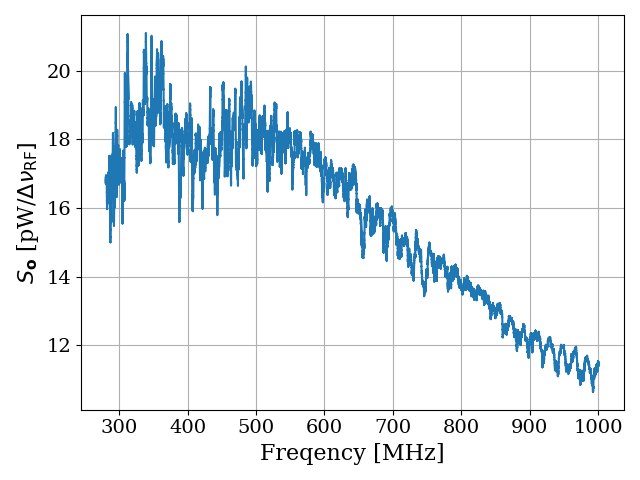

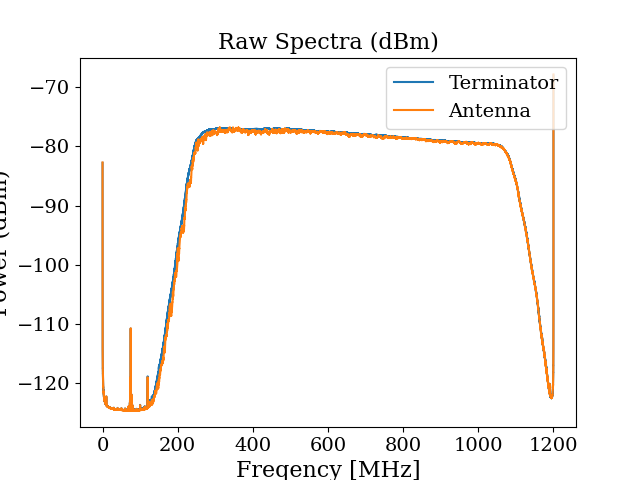

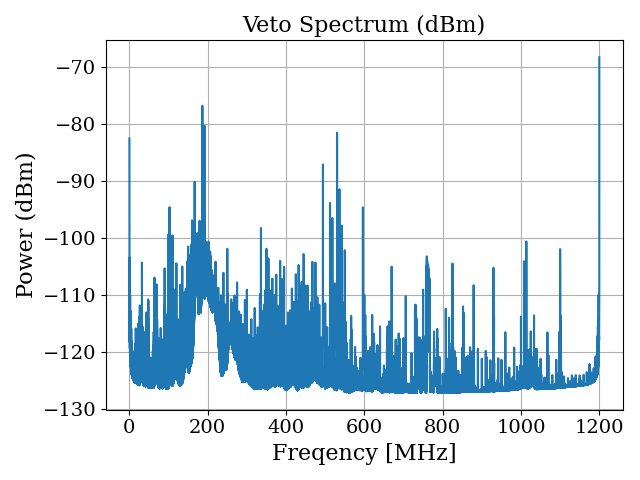

In [61]:
#plot raw spectra
freqs       = np.linspace(0, 2400e6/2, 2**22, dtype=np.float64)

plt.close('all')

#plt.title('Raw Spectra (Watts)')
#plt.plot(freqs/1e6, avgTermSpec[1:], label = 'Terminator')
idxStart = int(9.79e5)
idxStop = int(3.5e6)
plt.plot(freqs[idxStart:idxStop]/1e6, 1e12*avgAntSpec[idxStart:idxStop], label = 'Antenna')
plt.ylabel(r'$S_\mathbf{o}$ [pW/$\Delta \nu_\mathrm{RF}]$')
plt.xlabel('Freqency [MHz]')
#plt.legend(loc = 'upper right')
plt.tight_layout()
plt.grid()

plt.figure()
plt.title('Raw Spectra (dBm)')
plt.plot(freqs/1e6, 10*np.log10(avgTermSpec[1:]*1000), label = 'Terminator')
plt.plot(freqs/1e6, 10*np.log10(avgAntSpec[1:]*1000), label = 'Antenna')
plt.ylabel('Power (dBm)')
plt.xlabel('Freqency [MHz]')
plt.legend(loc = 'upper right')

plt.figure()
plt.title('Veto Spectrum (dBm)')
plt.plot(freqs/1e6, 10*np.log10(avgVetoSpec[1:]*1000))
plt.ylabel('Power (dBm)')
plt.xlabel('Freqency [MHz]')
plt.tight_layout()
plt.grid()

In [ ]:
#get gain